In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the Data
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz'
column_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points'] + [f'Wilderness_Area_{i}' for i in range(4)] + \
                [f'Soil_Type_{i}' for i in range(40)] + ['Cover_Type']
df = pd.read_csv(url, header=None, names=column_names)


In [3]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get basic information
print(df.info())

# Summary statistics
print(df.describe())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [4]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


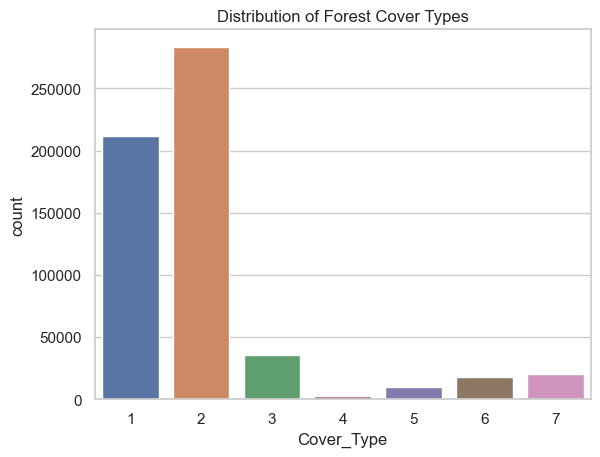

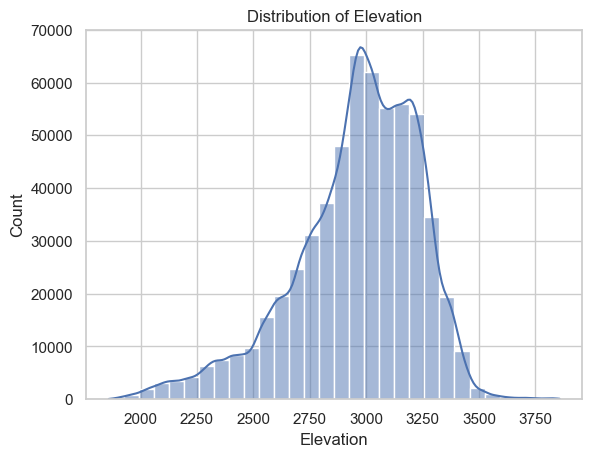

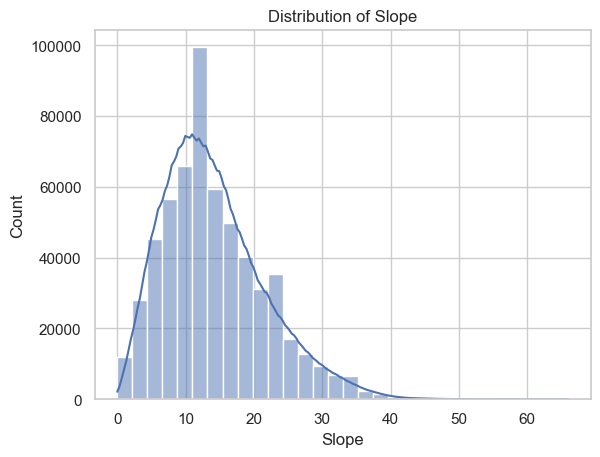

In [5]:
# Step 5: Data Visualization
# Distribution of cover types
sns.countplot(x='Cover_Type', data=df)
plt.title('Distribution of Forest Cover Types')
plt.show()

# Distribution of elevation
sns.histplot(df['Elevation'], kde=True, bins=30)
plt.title('Distribution of Elevation')
plt.show()

# Distribution of slope
sns.histplot(df['Slope'], kde=True, bins=30)
plt.title('Distribution of Slope')
plt.show()


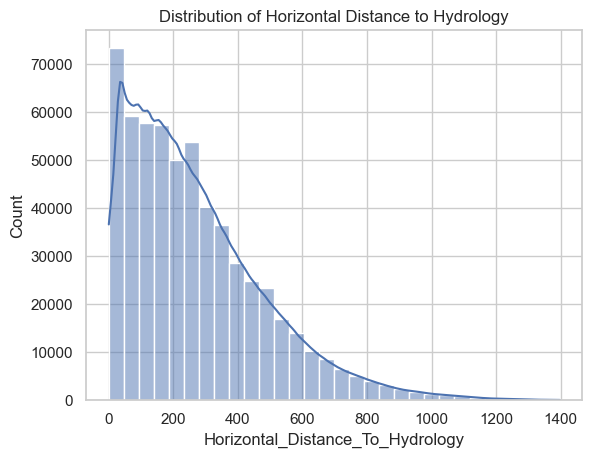

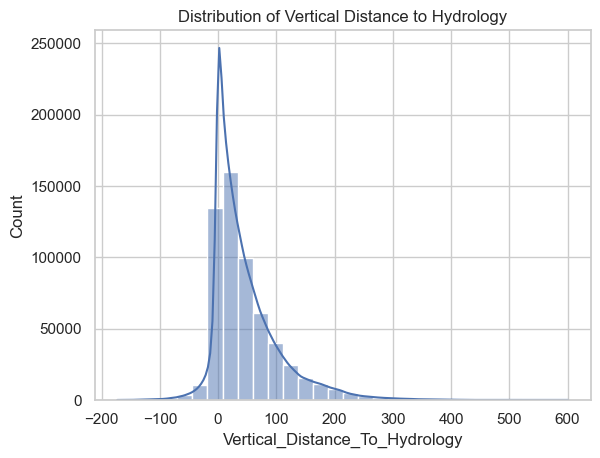

In [6]:
# Step 6: Univariate Analysis
# Distribution of horizontal distance to hydrology
sns.histplot(df['Horizontal_Distance_To_Hydrology'], kde=True, bins=30)
plt.title('Distribution of Horizontal Distance to Hydrology')
plt.show()

# Distribution of vertical distance to hydrology
sns.histplot(df['Vertical_Distance_To_Hydrology'], kde=True, bins=30)
plt.title('Distribution of Vertical Distance to Hydrology')
plt.show()


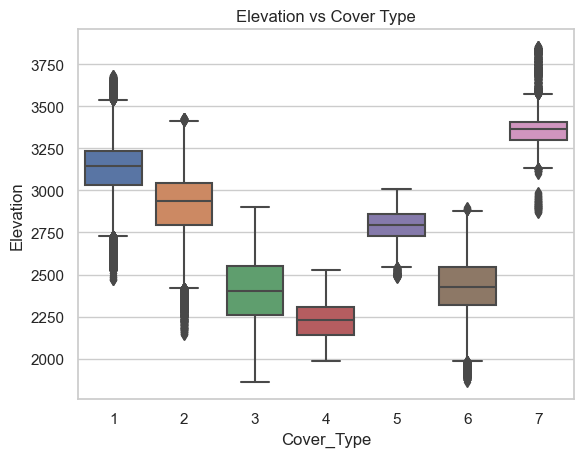

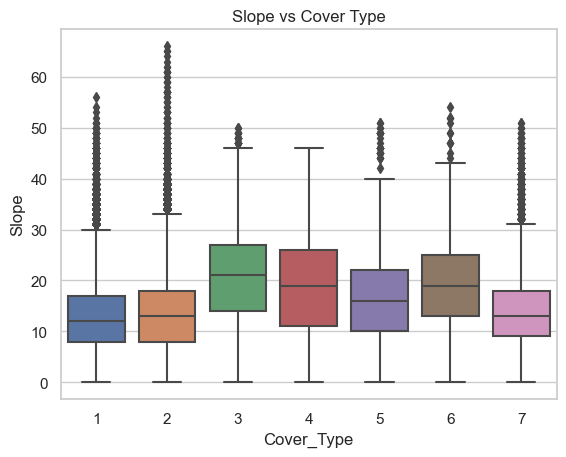

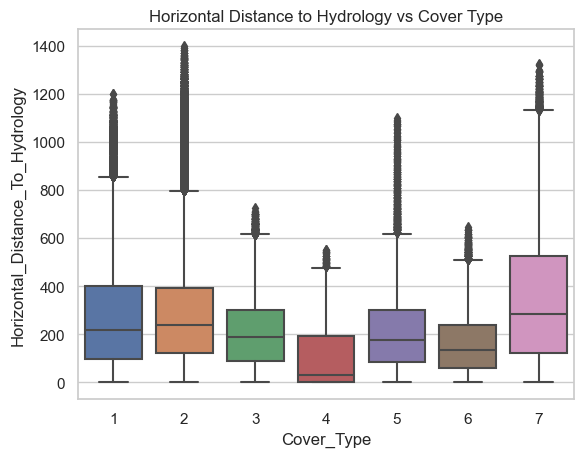

In [7]:
# Step 7: Bivariate Analysis
# Elevation vs Cover Type
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation vs Cover Type')
plt.show()

# Slope vs Cover Type
sns.boxplot(x='Cover_Type', y='Slope', data=df)
plt.title('Slope vs Cover Type')
plt.show()

# Horizontal Distance to Hydrology vs Cover Type
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Hydrology', data=df)
plt.title('Horizontal Distance to Hydrology vs Cover Type')
plt.show()


C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


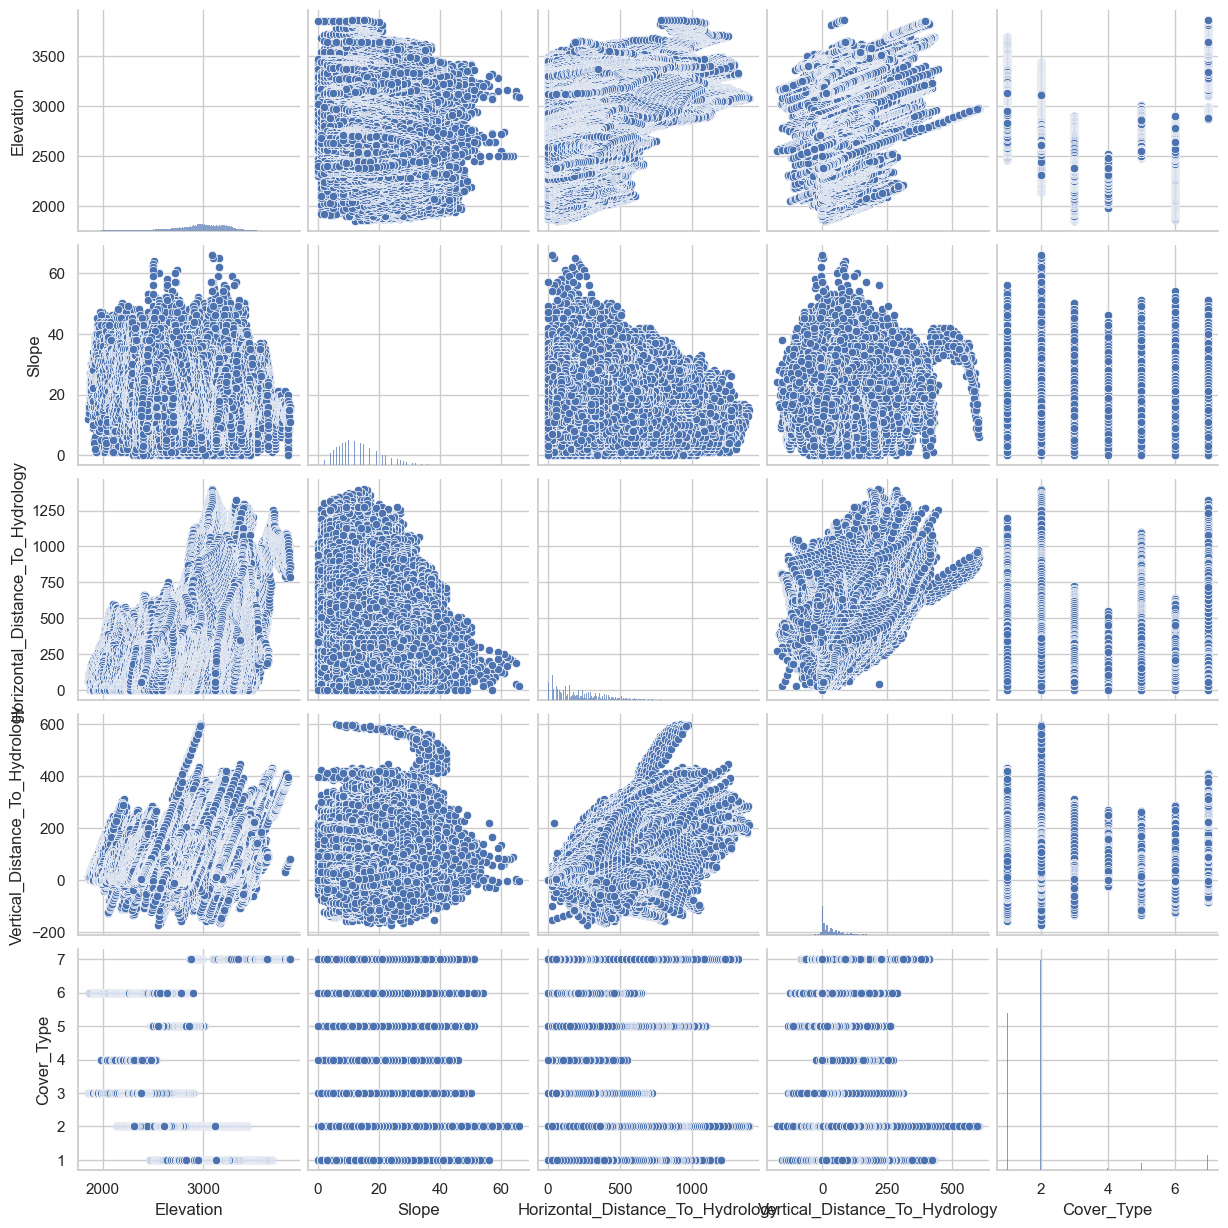

In [8]:
# Step 8: Multivariate Analysis
# Pair plot for selected features
sns.pairplot(df[['Elevation', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Cover_Type']])
plt.show()


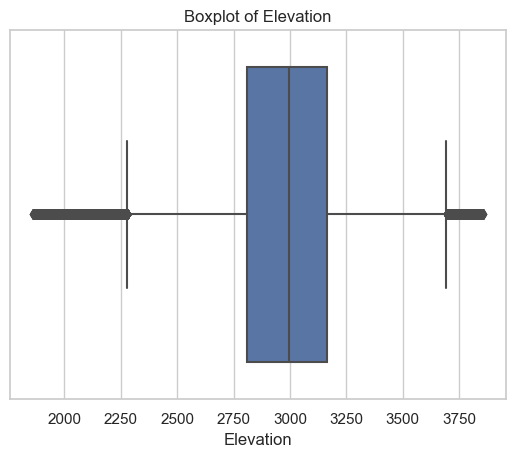

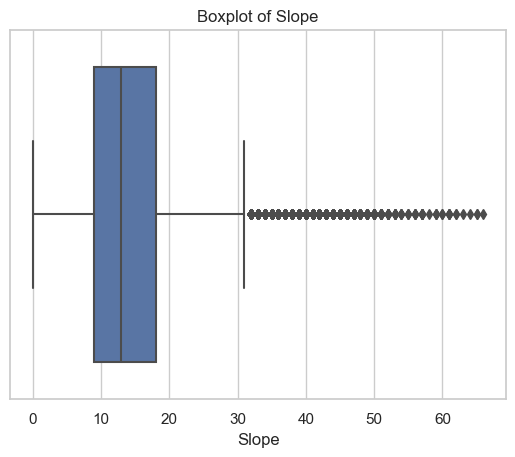

In [9]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in Elevation
sns.boxplot(x=df['Elevation'])
plt.title('Boxplot of Elevation')
plt.show()

# Removing outliers from Elevation
Q1 = df['Elevation'].quantile(0.25)
Q3 = df['Elevation'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Elevation'] < (Q1 - 1.5 * IQR)) | (df['Elevation'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in Slope
sns.boxplot(x=df['Slope'])
plt.title('Boxplot of Slope')
plt.show()


In [10]:
# Step 10: Feature Engineering
# Create additional features if needed
# For example, calculate total distance to hydrology
df['Total_Distance_To_Hydrology'] = df['Horizontal_Distance_To_Hydrology'] + df['Vertical_Distance_To_Hydrology']


In [11]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Cover type distribution
cover_type_dist = df['Cover_Type'].value_counts()
print(f"Cover Type Distribution:\n{cover_type_dist}")

# Average elevation, slope, and distance to hydrology of different cover types
avg_elevation = df.groupby('Cover_Type')['Elevation'].mean()
avg_slope = df.groupby('Cover_Type')['Slope'].mean()
avg_distance_to_hydrology = df.groupby('Cover_Type')['Horizontal_Distance_To_Hydrology'].mean()
print(f"Average Elevation by Cover Type:\n{avg_elevation}")
print(f"Average Slope by Cover Type:\n{avg_slope}")
print(f"Average Horizontal Distance to Hydrology by Cover Type:\n{avg_distance_to_hydrology}")

# Insights from box plots
print("Elevation and slope distributions vary significantly across different cover types, indicating their importance in classification.")


Key Insights:
Cover Type Distribution:
Cover_Type
2    283118
1    211840
3     26023
7     20048
6     13958
5      9493
4       963
Name: count, dtype: int64
Average Elevation by Cover Type:
Cover_Type
1    3128.644888
2    2921.384338
3    2489.056450
4    2332.685358
5    2787.417571
6    2489.054736
7    3352.591431
Name: Elevation, dtype: float64
Average Slope by Cover Type:
Cover_Type
1    13.127110
2    13.544805
3    18.481190
4    18.293873
5    16.641315
6    17.511176
7    14.298683
Name: Slope, dtype: float64
Average Horizontal Distance to Hydrology by Cover Type:
Cover_Type
1    270.555245
2    280.010949
3    226.229297
4    207.254413
5    212.354893
6    160.207408
7    342.054070
Name: Horizontal_Distance_To_Hydrology, dtype: float64
Elevation and slope distributions vary significantly across different cover types, indicating their importance in classification.


Findings:
1. Cover Type Distribution: Understanding the distribution of forest cover types helps in analyzing the prevalence of different types.
2. Elevation and Slope: Analyzing the distribution of elevation and slope provides insights into the terrain characteristics associated with different cover types.
3. Distance to Hydrology: Understanding the distances to hydrology features helps in analyzing their influence on forest cover types.
4. Correlations: The relationships between elevation, slope, distance to hydrology, and cover types can provide insights into the factors influencing forest classification.